In [308]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df= pd.read_csv(mouse_drug_data_to_load)
clinical_df= pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouseClinical= pd.merge(mouse_df, clinical_df, on="Mouse ID", how='outer')
# Display the data table for preview
mouseClinical_df= pd.DataFrame(mouseClinical)
mouseClinical.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [309]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumor_df = mouseClinical_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]


meanTumor_df= pd.DataFrame(meanTumor_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

meanTumor_df.reset_index(inplace = True)
meanTumor_df
# Convert to DataFrame
# Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [313]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdError= mouseClinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
stdError_df= pd.DataFrame(stdError)


stdError_df.reset_index(inplace = True)
stdError_df.head()
# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [314]:
# Come back to this
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked



tumor_response_pivot = meanTumor_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
tumor_response_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


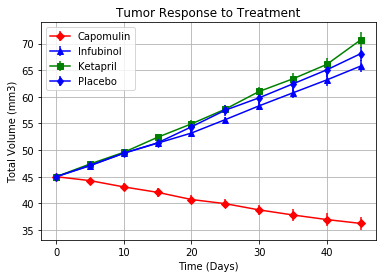

In [233]:
# Generate the Plot (with Error Bars)
time= mouseClinical_df['Timepoint'].unique()
errorCapomulin= mouseClinical_df[mouseClinical_df['Drug']=='Capomulin'].groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
errorInfubinol= mouseClinical_df[mouseClinical_df['Drug']=='Infubinol'].groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
errorKetapril= mouseClinical_df[mouseClinical_df['Drug']=='Ketapril'].groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
errorPlacebo= mouseClinical_df[mouseClinical_df['Drug']=='Placebo'].groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()


meanCapomulin= mouseClinical_df[mouseClinical_df['Drug']=='Capomulin'].groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
meanInfubinol= mouseClinical_df[mouseClinical_df['Drug']=='Infubinol'].groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
meanKetapril= mouseClinical_df[mouseClinical_df['Drug']=='Ketapril'].groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
meanPlacebo= mouseClinical_df[mouseClinical_df['Drug']=='Placebo'].groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()



plt.errorbar(time, meanCapomulin, yerr= errorCapomulin, marker="D", color="red", label="Capomulin")
plt.errorbar(time, meanInfubinol, yerr=errorInfubinol, marker="^" ,color="blue", label="Infubinol")          
plt.errorbar(time, meanKetapril, yerr= errorKetapril, marker= "s",color="green", label="Ketapril")
plt.errorbar(time, meanPlacebo, yerr=errorPlacebo, marker= "d",color="blue", label= "Placebo")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Total Volume (mm3)")
plt.grid()
plt.legend()
# Save the Figure


In [234]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [316]:




meanMeta_df= pd.DataFrame(mouseClinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())

meanMeta_df.reset_index(inplace = True)
meanMeta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [317]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
errorMeta= mouseClinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

errorMeta_df= pd.DataFrame(errorMeta)
errorMeta_df.reset_index(inplace = True)
errorMeta_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [319]:
# Come back to this
# Minor Data Munging to Re-Format the Data Frames
error_pivot = errorMeta_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
error_pivot.head()

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


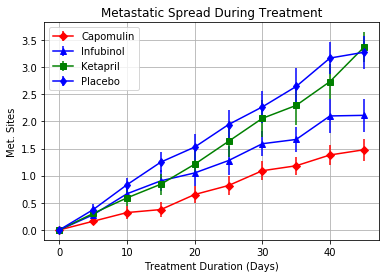

In [238]:
# Generate the Plot (with Error Bars)
# Generate the Plot (with Error Bars)
time= mouseClinical_df['Timepoint'].unique()
errorCapomulin= mouseClinical_df[mouseClinical_df['Drug']=='Capomulin'].groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
errorInfubinol= mouseClinical_df[mouseClinical_df['Drug']=='Infubinol'].groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
errorKetapril= mouseClinical_df[mouseClinical_df['Drug']=='Ketapril'].groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
errorPlacebo= mouseClinical_df[mouseClinical_df['Drug']=='Placebo'].groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()


meanCapomulin= mouseClinical_df[mouseClinical_df['Drug']=='Capomulin'].groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
meanInfubinol= mouseClinical_df[mouseClinical_df['Drug']=='Infubinol'].groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
meanKetapril= mouseClinical_df[mouseClinical_df['Drug']=='Ketapril'].groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
meanPlacebo= mouseClinical_df[mouseClinical_df['Drug']=='Placebo'].groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()



plt.errorbar(time, meanCapomulin, yerr= errorCapomulin, marker="D", color="red", label="Capomulin")
plt.errorbar(time, meanInfubinol, yerr=errorInfubinol, marker="^" ,color="blue", label="Infubinol")          
plt.errorbar(time, meanKetapril, yerr= errorKetapril, marker= "s",color="green", label="Ketapril")
plt.errorbar(time, meanPlacebo, yerr=errorPlacebo, marker= "d",color="blue", label= "Placebo")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.legend()
plt.show()
# Save the Figure

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [320]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouseCount= mouseClinical_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
dfCount= pd.DataFrame(mouseCount)
dfCount.rename(columns={'Mouse ID':'Mouse Count'}, inplace=True)
dfCount.reset_index(inplace = True)
dfCount.head()
# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [321]:
# Minor Data Munging to Re-Format the Data Frames

# Convert to DataFrame

count_pivot = dfCount.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  
count_pivot.head()

# Convert to DataFrame
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


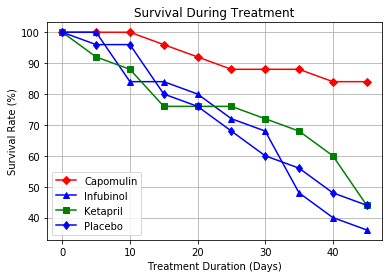

In [52]:
# Generate the Plot (Accounting for percentages)
time= mouseClinical_df['Timepoint'].unique()



meanCapomulin= mouseClinical_df[mouseClinical_df['Drug']=='Capomulin'].groupby(['Drug', 'Timepoint'])['Mouse ID'].count()/25*100
meanInfubinol= mouseClinical_df[mouseClinical_df['Drug']=='Infubinol'].groupby(['Drug', 'Timepoint'])['Mouse ID'].count()/25*100
meanKetapril= mouseClinical_df[mouseClinical_df['Drug']=='Ketapril'].groupby(['Drug', 'Timepoint'])['Mouse ID'].count()/25*100
meanPlacebo= mouseClinical_df[mouseClinical_df['Drug']=='Placebo'].groupby(['Drug', 'Timepoint'])['Mouse ID'].count()/25*100



plt.plot(time, meanCapomulin,marker="D", color="red", label="Capomulin")
plt.errorbar(time, meanInfubinol,marker="^" ,color="blue", label="Infubinol")          
plt.errorbar(time, meanKetapril, marker= "s",color="green", label="Ketapril")
plt.errorbar(time, meanPlacebo, marker= "d",color="blue", label= "Placebo")
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend()
plt.show()
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [89]:
# Calculate the percent changes for each drug
percentDrug=(mouseClinical_df[mouseClinical_df['Timepoint']==45].groupby(['Drug'])['Tumor Volume (mm3)'].mean() - mouseClinical_df[mouseClinical_df['Timepoint']==0].groupby(['Drug'])['Tumor Volume (mm3)'].mean())/mouseClinical_df[mouseClinical_df['Timepoint']==0].groupby(['Drug'])['Tumor Volume (mm3)'].mean()*100

print(percentDrug)                                                                                                        


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

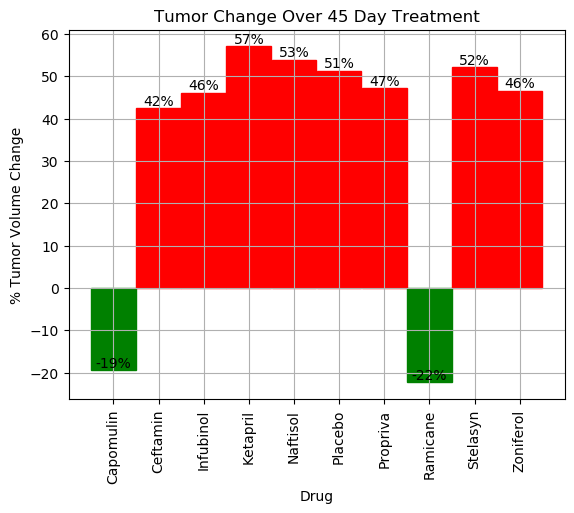

In [146]:
# Store all Relevant Percent Changes into a Tuple
percentDrug=(mouseClinical_df[mouseClinical_df['Timepoint']==45].groupby(['Drug'])['Tumor Volume (mm3)'].mean() - mouseClinical_df[mouseClinical_df['Timepoint']==0].groupby(['Drug'])['Tumor Volume (mm3)'].mean())/mouseClinical_df[mouseClinical_df['Timepoint']==0].groupby(['Drug'])['Tumor Volume (mm3)'].mean()*100










# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(percentDrug)

x_labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.rcdefaults()
fig, ax = plt.subplots()
width = .99

y_pos = np.arange(len(x_labels))

barlist = ax.bar(y_pos, freq_series, width, align='center', ecolor='black')
barlist[0].set_color('green')
barlist[1].set_color('red')
barlist[2].set_color('red')
barlist[3].set_color('red')
barlist[4].set_color('red')
barlist[5].set_color('red')
barlist[6].set_color('red')
barlist[7].set_color('green')
barlist[8].set_color('red')
barlist[9].set_color('red')



def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%d' % int(height)+ "%",
            ha='center', va='bottom')

autolabel(barlist)
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.xticks(y_pos,(x_labels))
plt.xticks(rotation=90)

plt.grid(True)


plt.show()




![Metastatic Spread During Treatment](../Images/change.png)